<a href="https://colab.research.google.com/github/satyam0402/python-ml/blob/main/Project_HousePrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Types of Supervised Learning :

1. Classification : Predicting class , eg : male, female, true , false.

2. Regression : Predicting quantity like price, age, salary etc.


Step 1 : Understanding the Work flow
1. House Price Data
2. Data Pre processing ( Feed data to dataframe and do some processing steps on the data to train the model well )
3. Data Analysis
4. Train Test split
5. Feed train data to XGBoost Regressor ( DT algo )
6. Evaluation


Step 2 : Importing the Dependecies

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [30]:
# Importing the California House Price Dataset
house_price_dataset = fetch_california_housing()
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [31]:
# Loading the dataset to pandas data frame for more structured dataset
house_price_dataframe = pd.DataFrame(house_price_dataset.data)
print(house_price_dataframe.head())
# We do not want this to be 0, 1, 2... as columns name we want label so :
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
print(house_price_dataframe.head())

        0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [32]:
# Price as target
house_price_dataframe['Price'] = house_price_dataset.target
print(house_price_dataframe.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [33]:
# Shape
print(house_price_dataframe.shape)

(20640, 9)


Step 2 : Data Pre processing

In [34]:
# 1. Checking null/missing values and remove
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [35]:
# 2. Statistical measures
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


STEP 3 : Uderstanding the various correlations between various features in the dataset.

There are two types of correlations :  
1. Positive correlation : One variable inc 2nd also inc.
2. Negative correlation :  Value of one variable dec then other also dec.


In [36]:
correlation_data = house_price_dataframe.corr() # .corr() eg : like first variable taken say MedInc then its relation will be checked with all the other variables in the dataset.

<Axes: >

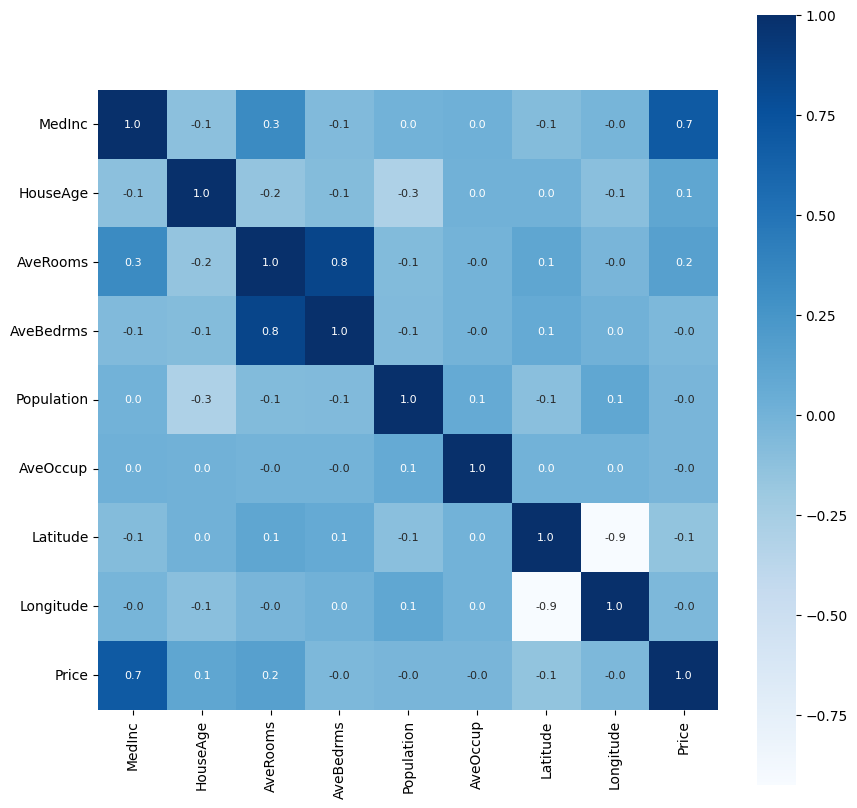

In [37]:
# Heatmap using seaborn as sns to understand the correlation.
plt.figure(figsize = (10,10))
sns.heatmap(correlation_data, cbar = True, square = True, fmt = '.1f' ,  annot =True, annot_kws={'size':8}, cmap = 'Blues')
#cbar = true means we want the color bar.
#square = True means we want the map as square.
# fmt : Means how many float value we want .1f means 1 value after decimal.
#annot = True means annotations that is MedInc, HouseAge etc.
#annot_kws means size of text number etc.
#cmap means color of the map.

# Here max value of the correlation is. + 1 that is if one value inc then the other also inc.

#Diagonal has max value of 1

Step 4 : Splitting the data and target and then into train and test.



In [38]:
X = house_price_dataframe.drop(['Price'], axis = 1)
Y = house_price_dataframe['Price']

In [39]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state = 2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(20640, 8) (16512, 8) (4128, 8)
(20640,) (16512,) (4128,)


Step 5 : Model Training

In [42]:
# XGBOOST Regressor (DT Model)
# Loading the model
XGB_model = XGBRegressor()
XGB_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Step 6 : Prediction and Evaluation

In [43]:
# For Classification problems we use the accuracy score but we can not do that for regression. In accuracy score we count the nimber of correctly predicted values and found the difference b/w predicted value and original value. For regression we find r square error and mean square error

# Accuracy for Prediction on training data
predict_training_data = XGB_model.predict(X_train)
print(predict_training_data)

predict_test_data = XGB_model.predict(X_test)
print(predict_test_data)


[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]
[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [44]:
# Comparing with Y train -  R square error
error_score1 = metrics.r2_score(Y_train, predict_training_data)
print("R squared error : ", error_score1)
# Mean Absolute Error
error_score2 = metrics.mean_absolute_error(Y_train, predict_training_data)
print("Mean Absolute Error : ", error_score2)

R squared error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


Error value for Test Data

In [45]:
# R square for Test data
error_score3 = metrics.r2_score(Y_test, predict_test_data)
print("R squared error : ", error_score3)

# Mean absolute error for test data
error_score4 = metrics.mean_absolute_error(Y_test, predict_test_data)
print("Mean Absolute Error : ", error_score4)

R squared error :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186


Visualisation of Actual Price and Predicted price

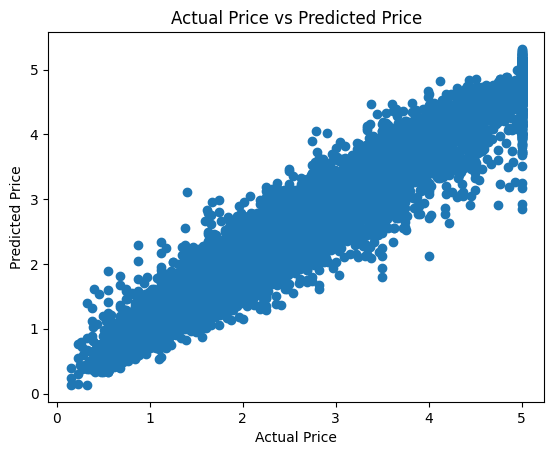

In [46]:
# Scatter plot
plt.scatter(Y_train, predict_training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()